In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.customcnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [19]:
model = CustomConvNet(weight_scale=0.001, use_batchnorm=False, conv_layers=1, num_filters=64, hidden_dim=100, reg=0.001)

solver = Solver(model, data,
            num_epochs=1, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=20)
solver.train()

W1 (64, 3, 3, 3)
W3 (100, 10)
b1 (64,)
b2 (100,)
b3 (10,)
W2 (16384, 100)
(Iteration 1 / 980) loss: 2.303360
(Epoch 0 / 1) train acc: 0.100000; val_acc: 0.112000
(Iteration 21 / 980) loss: 2.154510
(Iteration 41 / 980) loss: 2.214196
(Iteration 61 / 980) loss: 1.843247
(Iteration 81 / 980) loss: 1.769953
(Iteration 101 / 980) loss: 1.667163
(Iteration 121 / 980) loss: 1.653933
(Iteration 141 / 980) loss: 1.616084
(Iteration 161 / 980) loss: 1.829070
(Iteration 181 / 980) loss: 1.638083
(Iteration 201 / 980) loss: 1.793520
(Iteration 221 / 980) loss: 1.503453
(Iteration 241 / 980) loss: 1.670234
(Iteration 261 / 980) loss: 1.544840
(Iteration 281 / 980) loss: 1.670234
(Iteration 301 / 980) loss: 1.403292
(Iteration 321 / 980) loss: 1.490693
(Iteration 341 / 980) loss: 1.526679
(Iteration 361 / 980) loss: 1.653968
(Iteration 381 / 980) loss: 1.234494
(Iteration 401 / 980) loss: 1.512172
(Iteration 421 / 980) loss: 1.734650
(Iteration 441 / 980) loss: 1.359421


KeyboardInterrupt: 

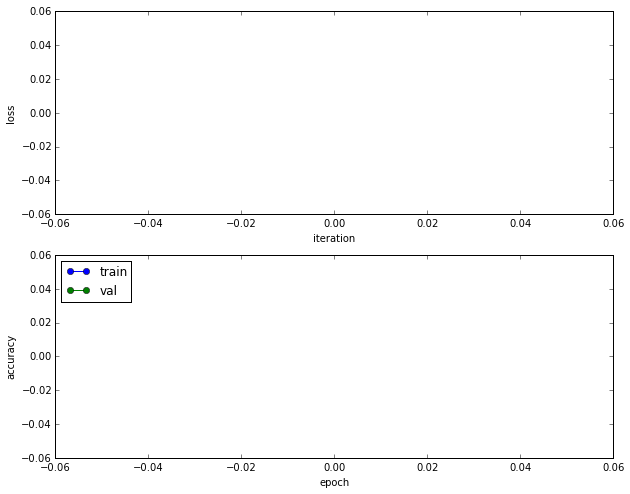

In [5]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [42]:
num_train = 5000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

In [79]:
def train(weight_scale=0.001, use_batchnorm=False, conv_layers=1, num_filters=32, hidden_dim=500, reg=0.001, filter_size=3):
    model = CustomConvNet(weight_scale=weight_scale, use_batchnorm=use_batchnorm, conv_layers=conv_layers, filter_size=filter_size, num_filters=num_filters, hidden_dim=hidden_dim, reg=reg)

    solver = Solver(model, small_data,
                    num_epochs=1, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': 1e-3,
                    },
                    verbose=False, print_every=20)
    solver.train()
    print 'Best val accuracy %f' % solver.best_val_acc
    return solver

def train_full(weight_scale=0.001, use_batchnorm=False, conv_layers=1, num_filters=32, hidden_dim=500, reg=0.001, filter_size=3):
    model = CustomConvNet(weight_scale=weight_scale, use_batchnorm=use_batchnorm, conv_layers=conv_layers, filter_size=filter_size, num_filters=num_filters, hidden_dim=hidden_dim, reg=reg)

    solver = Solver(model, data,
                    num_epochs=5, batch_size=50,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': 1e-3,
                      'lr_decay': 0.99
                    },
                    verbose=True, print_every=20)
    solver.train()
    print 'Best val accuracy %f' % solver.best_val_acc
    return solver

In [46]:
weight_scales = [0.01, 0.001] 
for w in weight_scales:
    print 'Training with weight_scales %f' % w
    s = train(weight_scale=w)
    results['w%d'] = s
    
for k,v in results.iteritems():
    print '%f: train_acc:%f val_acc:%f' % (k, v.train_acc_history[-1], v.val_acc_history[-1])

Training with weight_scales 0.010000
(Iteration 1 / 100) loss: 2.628037
(Epoch 0 / 1) train acc: 0.137000; val_acc: 0.141000
(Iteration 21 / 100) loss: 2.102934
(Iteration 41 / 100) loss: 2.075205
(Iteration 61 / 100) loss: 2.173189
(Iteration 81 / 100) loss: 1.877705
(Epoch 1 / 1) train acc: 0.427000; val_acc: 0.390000
Best val accuracy 0.390000
Training with weight_scales 0.001000
(Iteration 1 / 100) loss: 2.304718
(Epoch 0 / 1) train acc: 0.103000; val_acc: 0.102000
(Iteration 21 / 100) loss: 1.985477
(Iteration 41 / 100) loss: 2.062503
(Iteration 61 / 100) loss: 1.820376
(Iteration 81 / 100) loss: 1.781590
(Epoch 1 / 1) train acc: 0.357000; val_acc: 0.345000
Best val accuracy 0.345000
500.000000: train_acc:0.405000 val_acc:0.373000
50.000000: train_acc:0.396000 val_acc:0.357000
0.001000: train_acc:0.357000 val_acc:0.345000
100.000000: train_acc:0.351000 val_acc:0.358000
0.010000: train_acc:0.427000 val_acc:0.390000


In [44]:
hidden_dim = [50, 100, 500]
#500.000000: train_acc:0.405000 val_acc:0.373000
#50.000000: train_acc:0.396000 val_acc:0.357000
#100.000000: train_acc:0.351000 val_acc:0.358000
results = {}

for h in hidden_dim:
    print 'Training with hidden_dim %f' % h
    s = train(hidden_dim=h)
    results['h%d' % h] = s
    
for k,v in results.iteritems():
    print '%f: train_acc:%f val_acc:%f' % (k, v.train_acc_history[-1], v.val_acc_history[-1])

Training with hidden_dim 50.000000
(Iteration 1 / 100) loss: 2.302756
(Epoch 0 / 1) train acc: 0.110000; val_acc: 0.087000
(Iteration 21 / 100) loss: 2.076639
(Iteration 41 / 100) loss: 1.896151
(Iteration 61 / 100) loss: 1.911289
(Iteration 81 / 100) loss: 1.763994
(Epoch 1 / 1) train acc: 0.396000; val_acc: 0.357000
Best val accuracy 0.357000
Training with hidden_dim 100.000000
(Iteration 1 / 100) loss: 2.302971
(Epoch 0 / 1) train acc: 0.096000; val_acc: 0.075000
(Iteration 21 / 100) loss: 2.233328
(Iteration 41 / 100) loss: 2.058822
(Iteration 61 / 100) loss: 2.065437
(Iteration 81 / 100) loss: 1.950949
(Epoch 1 / 1) train acc: 0.351000; val_acc: 0.358000
Best val accuracy 0.358000
Training with hidden_dim 500.000000
(Iteration 1 / 100) loss: 2.304615
(Epoch 0 / 1) train acc: 0.093000; val_acc: 0.102000
(Iteration 21 / 100) loss: 2.037856
(Iteration 41 / 100) loss: 2.021698
(Iteration 61 / 100) loss: 1.773564
(Iteration 81 / 100) loss: 1.656124
(Epoch 1 / 1) train acc: 0.405000; va

In [51]:
s = train(use_batchnorm=True)
results['bn'] = s
#bn: train_acc:0.305000 val_acc:0.324000

for k,v in results.iteritems():
    print '%s: train_acc:%f val_acc:%f' % (k, v.train_acc_history[-1], v.val_acc_history[-1])

100: train_acc:0.351000 val_acc:0.358000
bn: train_acc:0.305000 val_acc:0.324000
0.001: train_acc:0.357000 val_acc:0.345000
50: train_acc:0.396000 val_acc:0.357000
500: train_acc:0.405000 val_acc:0.373000
0.01: train_acc:0.427000 val_acc:0.390000


In [56]:
filter_size = [7, 5, 3]

for f in filter_size:
    print 'Training with filter_size %f' % f
    s = train(filter_size=f)
    results['f%d' % f] = s
    
for k,v in results.iteritems():
    print '%s: train_acc:%f val_acc:%f' % (k, v.train_acc_history[-1], v.val_acc_history[-1])

Training with filter_size 7.000000
Best val accuracy 0.380000
Training with filter_size 5.000000
Best val accuracy 0.375000
Training with filter_size 3.000000
Best val accuracy 0.386000
f3: train_acc:0.419000 val_acc:0.386000
f5: train_acc:0.389000 val_acc:0.375000
f7: train_acc:0.383000 val_acc:0.380000


In [62]:
# weight_scale, hidden_dim, reg, num_filters

params = [
            (0.01, 500, 0.01, 32, 2),
         ]

# (0.01, 500, 0.001, 32) val_acc:0.370000
# (0.01, 500, 0.01, 32) 0.414000
# (0.01, 500, 0.1, 32) 0.405000
# (0.01, 500, 0.001, 16) 0.377000
# (0.01, 1000, 0.001, 32) 0.396000

#(0.009, 500, 0.01, 32, 1): train_acc:0.376000 val_acc:0.362000
#(0.01, 500, 0.01, 32, 3): train_acc:0.351000 val_acc:0.327000
#(0.03, 500, 0.01, 32, 1): train_acc:0.434000 val_acc:0.390000
#(0.01, 500, 0.01, 48, 1): train_acc:0.407000 val_acc:0.384000
#(0.01, 500, 0.001, 32, 1): train_acc:0.373000 val_acc:0.381000
#(0.01, 500, 0.01, 32, 2): train_acc:0.448000 val_acc:0.423000
#(0.05, 500, 0.01, 32, 1): train_acc:0.269000 val_acc:0.240000
#(0.01, 600, 0.01, 32, 1): train_acc:0.354000 val_acc:0.344000
#(0.01, 500, 0.01, 48, 3): train_acc:0.308000 val_acc:0.339000
#(0.01, 500, 0.1, 32, 1): train_acc:0.397000 val_acc:0.353000
#(0.01, 500, 0.01, 32, 1): train_acc:0.409000 val_acc:0.391000
#(0.01, 500, 0.001, 16, 1): train_acc:0.451000 val_acc:0.400000
#(0.01, 400, 0.01, 32, 1): train_acc:0.393000 val_acc:0.375000
#(0.01, 500, 0.01, 48, 2): train_acc:0.421000 val_acc:0.365000
            
results = {}

for p in params:
    print 'Training with p', p
    w, h, reg, filters, c = p
    s = train(weight_scale=w, hidden_dim=h, reg=reg, num_filters=filters, conv_layers=c)
    results[p] = s
    
for k,v in results.iteritems():
    print '%s: train_acc:%f val_acc:%f' % (str(k), v.train_acc_history[-1], v.val_acc_history[-1])

Training with p (0.01, 500, 0.01, 32, 2)
Best val accuracy 0.423000
Training with p (0.01, 500, 0.01, 48, 2)
Best val accuracy 0.365000
Training with p (0.01, 500, 0.01, 32, 3)
Best val accuracy 0.327000
Training with p (0.01, 500, 0.01, 48, 3)
Best val accuracy 0.339000
Training with p (0.01, 500, 0.001, 32, 1)
Best val accuracy 0.381000
Training with p (0.01, 500, 0.01, 32, 1)
Best val accuracy 0.398000
Training with p (0.01, 600, 0.01, 32, 1)
Best val accuracy 0.344000
Training with p (0.01, 400, 0.01, 32, 1)
Best val accuracy 0.375000
Training with p (0.01, 500, 0.01, 48, 1)
Best val accuracy 0.384000
Training with p (0.03, 500, 0.01, 32, 1)
Best val accuracy 0.390000
Training with p (0.05, 500, 0.01, 32, 1)
Best val accuracy 0.240000
Training with p (0.009, 500, 0.01, 32, 1)
Best val accuracy 0.362000
Training with p (0.01, 500, 0.1, 32, 1)
Best val accuracy 0.353000
Training with p (0.01, 500, 0.001, 16, 1)
Best val accuracy 0.400000
Training with p (0.01, 500, 0.01, 32, 1)
Best 

In [ ]:
# weight_scale, hidden_dim, reg, num_filters, filter_size

params = [
            (0.01, 500, 0.01, 32, 3, 5),
         ]

# (0.01, 500, 0.001, 32) val_acc:0.370000
# (0.01, 500, 0.01, 32) 0.414000
# (0.01, 500, 0.1, 32) 0.405000
# (0.01, 500, 0.001, 16) 0.377000
# (0.01, 1000, 0.001, 32) 0.396000

#(0.009, 500, 0.01, 32, 1): train_acc:0.376000 val_acc:0.362000
#(0.01, 500, 0.01, 32, 3): train_acc:0.351000 val_acc:0.327000
#(0.03, 500, 0.01, 32, 1): train_acc:0.434000 val_acc:0.390000
#(0.01, 500, 0.01, 48, 1): train_acc:0.407000 val_acc:0.384000
#(0.01, 500, 0.001, 32, 1): train_acc:0.373000 val_acc:0.381000
#(0.01, 500, 0.01, 32, 2): train_acc:0.448000 val_acc:0.423000
#(0.05, 500, 0.01, 32, 1): train_acc:0.269000 val_acc:0.240000
#(0.01, 600, 0.01, 32, 1): train_acc:0.354000 val_acc:0.344000
#(0.01, 500, 0.01, 48, 3): train_acc:0.308000 val_acc:0.339000
#(0.01, 500, 0.1, 32, 1): train_acc:0.397000 val_acc:0.353000
#(0.01, 500, 0.01, 32, 1): train_acc:0.409000 val_acc:0.391000
#(0.01, 500, 0.001, 16, 1): train_acc:0.451000 val_acc:0.400000
#(0.01, 400, 0.01, 32, 1): train_acc:0.393000 val_acc:0.375000
#(0.01, 500, 0.01, 48, 2): train_acc:0.421000 val_acc:0.365000
            
for p in params:
    print 'Training with p', p
    w, h, reg, filters, c, f = p
    s = train_full(weight_scale=w, hidden_dim=h, reg=reg, num_filters=filters, conv_layers=c, filter_size=f)
    results[p] = s
    
for k,v in results.iteritems():
    print '%s: train_acc:%f val_acc:%f' % (str(k), v.train_acc_history[-1], v.val_acc_history[-1])

Training with p (0.01, 500, 0.01, 32, 3, 5)
(Iteration 1 / 4900) loss: 2.461398
(Epoch 0 / 5) train acc: 0.090000; val_acc: 0.114000
(Iteration 21 / 4900) loss: 2.036555
(Iteration 41 / 4900) loss: 2.093730
(Iteration 61 / 4900) loss: 2.129284
(Iteration 81 / 4900) loss: 1.759815
(Iteration 101 / 4900) loss: 2.054381
(Iteration 121 / 4900) loss: 1.623914
(Iteration 141 / 4900) loss: 1.565334

In [71]:
#solver = results[(0.01, 500, 0.01, 20, 3)]
m = solver.model

solver = Solver(m, data,
                num_epochs=5, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-5,
                },
                verbose=True, print_every=20)
solver.train()

(Iteration 1 / 4900) loss: 0.875002
(Epoch 0 / 5) train acc: 0.785000; val_acc: 0.753000
(Iteration 21 / 4900) loss: 0.849821
(Iteration 41 / 4900) loss: 0.930855
(Iteration 61 / 4900) loss: 0.779834
(Iteration 81 / 4900) loss: 0.965055
(Iteration 101 / 4900) loss: 1.004233
(Iteration 121 / 4900) loss: 0.812089
(Iteration 141 / 4900) loss: 0.779637
(Iteration 161 / 4900) loss: 0.828388
(Iteration 181 / 4900) loss: 0.675681
(Iteration 201 / 4900) loss: 0.876269
(Iteration 221 / 4900) loss: 0.754337
(Iteration 241 / 4900) loss: 0.899617
(Iteration 261 / 4900) loss: 1.051439
(Iteration 281 / 4900) loss: 0.741373
(Iteration 301 / 4900) loss: 0.815148
(Iteration 321 / 4900) loss: 0.675291
(Iteration 341 / 4900) loss: 0.688571
(Iteration 361 / 4900) loss: 0.570902
(Iteration 381 / 4900) loss: 0.989152
(Iteration 401 / 4900) loss: 0.686921
(Iteration 421 / 4900) loss: 0.888529
(Iteration 441 / 4900) loss: 0.645746
(Iteration 461 / 4900) loss: 0.988668
(Iteration 481 / 4900) loss: 0.735332
(It

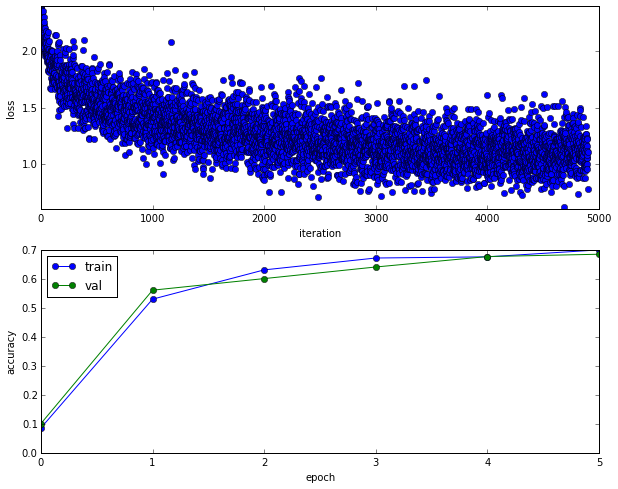

In [77]:
plt.subplot(2, 1, 1)
plt.plot(s.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(s.train_acc_history, '-o')
plt.plot(s.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

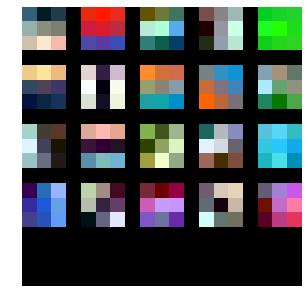

In [73]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(solver.model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()